In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import r2_score
#Setting of proper views of rows and columns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df = pd.read_csv('telecom_churn_data.csv')
#Exploring the top 5 rows
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [4]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
df.shape

(99999, 226)

## Handling missing values

In [7]:
#percentage of missing value in the data.
percentage_df = round((df.isnull().mean())*100,2)
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Column_Name","Pencentage_null"]  
percentage_df

,Column_Name,Pencentage_null
0,mobile_number,0.00
1,circle_id,0.00
2,loc_og_t2o_mou,1.02
3,std_og_t2o_mou,1.02
4,loc_ic_t2o_mou,1.02
5,last_date_of_month_6,0.00
6,last_date_of_month_7,0.60
7,last_date_of_month_8,1.10
8,last_date_of_month_9,1.66
9,arpu_6,0.00


In [8]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [9]:
# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8


## Impute missing values

In [10]:
# Columns with more than 70% missing values
col_missing_data = round(100*(df.isnull().sum()/len(df.index)), 2)
col_missing_data[col_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [11]:
print("Total columns having 70% of missing data",len(col_missing_data[col_missing_data >= 70]))

Total columns having 70% of missing data 40


So we have to take care of these columns so that we do not drop the columns related to the recharge amounts. Thus to avoid doing that first we have to deal with the missing values in these columns -

1. total_rech_data_6 - 74.85 % missing values
2. total_rech_data_7 - 74.43 % missing values
3. total_rech_data_8 - 73.66 % missing values
4. total_rech_data_9 - 74.08 % missing values
5. av_rech_amt_data_6 - 74.85 % missing values
6. av_rech_amt_data_7 - 74.43 % missing values
7. av_rech_amt_data_8 - 73.66 % missing values
8. av_rech_amt_data_9 - 74.08 % missing values

We have 4 more columns as -

1. date_of_last_rech_data_6 - 74.85 % missing values
2. date_of_last_rech_data_7 - 74.43 % missing values
3. date_of_last_rech_data_8 - 73.66 % missing values
2. date_of_last_rech_data_9 - 74.08 % missing values


In [12]:
# The logic here would be to check if columns - 'total_rech_data_6' and 'date_of_last_rech_data_6' both 
# have null values at the same index. If yes, then that would mean there was no data recharge done for that month
# and we can safely impute the 'total_rech_data_6' value with 0.

total_rech_data_6_index = df['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = df['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')

The indexes for NULL values for month 6 are equal


In [13]:
total_rech_data_7_index = df['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = df['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [14]:
total_rech_data_8_index = df['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = df['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


In [15]:
total_rech_data_9_index = df['total_rech_data_9'].isnull()
date_of_last_rech_data_9_index = df['date_of_last_rech_data_9'].isnull()

if total_rech_data_9_index.equals(date_of_last_rech_data_9_index):
    print('The indexes for NULL values for month 9 are equal')

The indexes for NULL values for month 9 are equal


In [16]:
#let see the data describtion 
l = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6',
     'av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
df[l].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000


<Figure size 432x288 with 0 Axes>

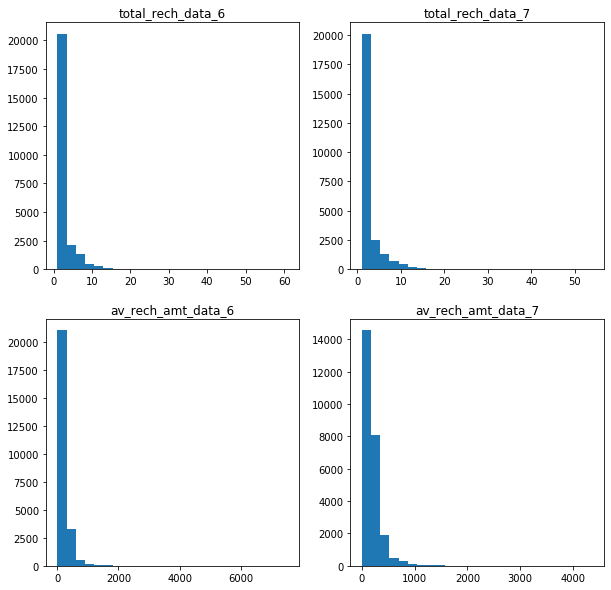

In [17]:
# Let us look at the distribution to find out the value to fill
# total_rech_data_6
plt.figure(1)
fig = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(df.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(df.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(df.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(df.av_rech_amt_data_7.dropna(),bins=25)
plt.show()

In [18]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [19]:
# impute missing values with 0
df[zero_impute] = df[zero_impute].apply(lambda x: x.fillna(0))

In [20]:
# Columns with more than 70% missing values
col_missing_data = round(100*(df.isnull().sum()/len(df.index)), 2)
# print(len(col_missing_data[col_missing_data >= 70]))
col_missing_data[col_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7                   74.43
fb_user_8                   73.66
fb_user_9                   74.08
dtype: float64

## Handling categorical variables

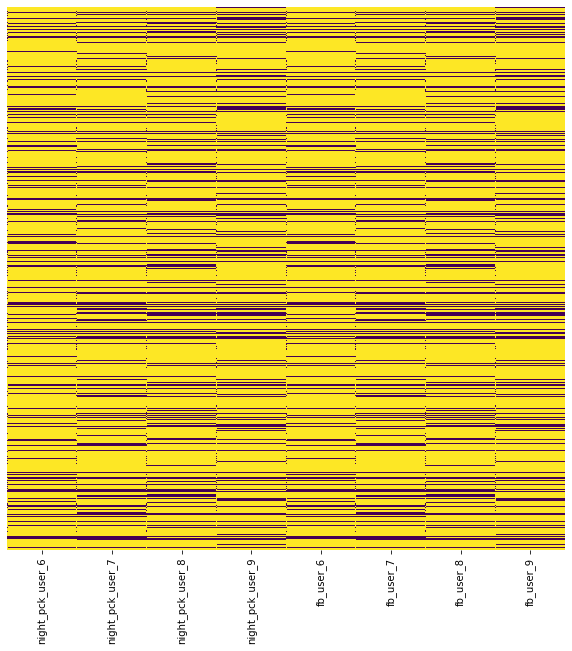

In [21]:
plt.figure(figsize =(10,10))
sns.heatmap(df[cat_cols].isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

There are 8 of them and all of these have more than 70% missing values. Missing values can be imputed with '-1' where -1 can be treated as a new category.

CATEGORICAL VARIABLES:

1. night_pck_user_6
2. night_pck_user_7
3. night_pck_user_8
4. night_pck_user_9
5. fb_user_6
6. fb_user_7
7. fb_user_8
8. fb_user_9

In [22]:
# #replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [23]:
# Columns with more than 70% missing values
col_missing_data = round(100*(df.isnull().sum()/len(df.index)), 2)
# print(len(col_missing_data[col_missing_data >= 70]))
col_missing_data[col_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
dtype: float64

In [24]:
#dropping columns having more than 70% of missing values
m_df=df.loc[:,df.isnull().mean()<.7]
m_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.

In [25]:
#percentage of missing value in the data.
percentage_df = round((m_df.isnull().mean())*100,2)
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Column_Name","Pencentage_null"]  
percentage_df

,Column_Name,Pencentage_null
0,mobile_number,0.00
1,circle_id,0.00
2,loc_og_t2o_mou,1.02
3,std_og_t2o_mou,1.02
4,loc_ic_t2o_mou,1.02
5,last_date_of_month_6,0.00
6,last_date_of_month_7,0.60
7,last_date_of_month_8,1.10
8,last_date_of_month_9,1.66
9,arpu_6,0.00


In [26]:
# The date columns will not be of any use to us during the analysis.
# Let's delete the date columns as we do not need them.
drop_date = [x for x in list(m_df) if x.startswith("date_")]
drop_date += ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
m_df = m_df.drop(drop_date, axis=1)

In [27]:
m_df.shape

(99999, 198)

In [28]:
def getMissingValues(missingCutoff):
    # Function to retun the columns with more than missingCutoff% missing values.
    # argument: missingCutoff, % values threshold for missing values
    missing = round(100*(m_df.isnull().sum()/m_df.shape[0]))
    print("There are {} features having more than {}% missing values/entries".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [29]:
col = getMissingValues(0)

There are 119 features having more than 0% missing values/entries


In [30]:
col

loc_og_t2o_mou      1.0
std_og_t2o_mou      1.0
loc_ic_t2o_mou      1.0
onnet_mou_6         4.0
onnet_mou_7         4.0
onnet_mou_8         5.0
onnet_mou_9         8.0
offnet_mou_6        4.0
offnet_mou_7        4.0
offnet_mou_8        5.0
offnet_mou_9        8.0
roam_ic_mou_6       4.0
roam_ic_mou_7       4.0
roam_ic_mou_8       5.0
roam_ic_mou_9       8.0
roam_og_mou_6       4.0
roam_og_mou_7       4.0
roam_og_mou_8       5.0
roam_og_mou_9       8.0
loc_og_t2t_mou_6    4.0
loc_og_t2t_mou_7    4.0
loc_og_t2t_mou_8    5.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_6    4.0
loc_og_t2m_mou_7    4.0
loc_og_t2m_mou_8    5.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_6    4.0
loc_og_t2f_mou_7    4.0
loc_og_t2f_mou_8    5.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_6    4.0
loc_og_t2c_mou_7    4.0
loc_og_t2c_mou_8    5.0
loc_og_t2c_mou_9    8.0
loc_og_mou_6        4.0
loc_og_mou_7        4.0
loc_og_mou_8        5.0
loc_og_mou_9        8.0
std_og_t2t_mou_6    4.0
std_og_t2t_mou_7    4.0
std_og_t2t_mou_8

In [31]:
from sklearn.impute import SimpleImputer
col = m_df.columns
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
m_df = pd.DataFrame(imputer.fit_transform(m_df))
m_df.columns = col
m_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7.000843e+09,109.0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,968.0,30.4,0.0,101.20,3.58
1,7.001866e+09,109.0,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,3

In [32]:
#percentage of missing value in the data.
percentage_df = round((m_df.isnull().mean())*100,2)
percentage_df = pd.DataFrame(percentage_df)
percentage_df = percentage_df.reset_index() 
percentage_df.columns = ["Column_Name","Pencentage_null"]  
percentage_df

,Column_Name,Pencentage_null
0,mobile_number,0.0
1,circle_id,0.0
2,loc_og_t2o_mou,0.0
3,std_og_t2o_mou,0.0
4,loc_ic_t2o_mou,0.0
5,arpu_6,0.0
6,arpu_7,0.0
7,arpu_8,0.0
8,arpu_9,0.0
9,onnet_mou_6,0.0


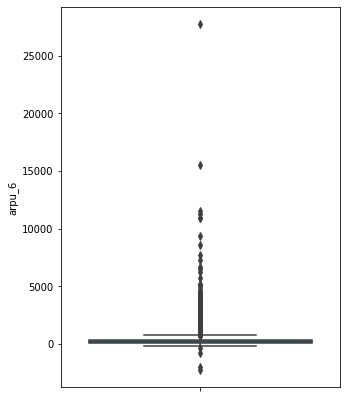

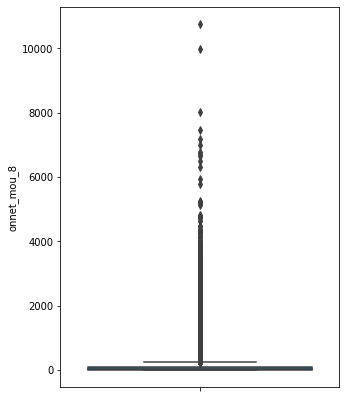

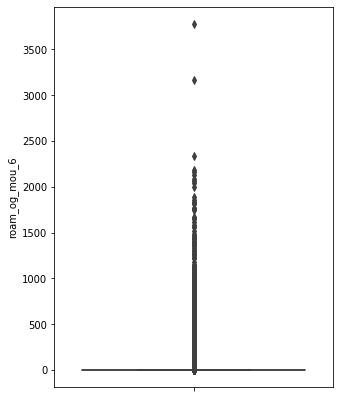

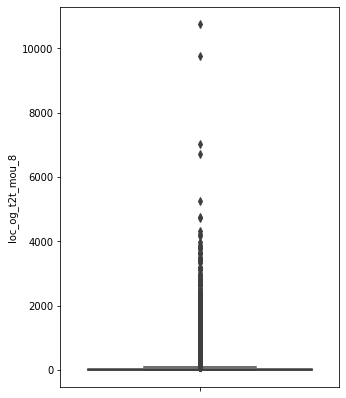

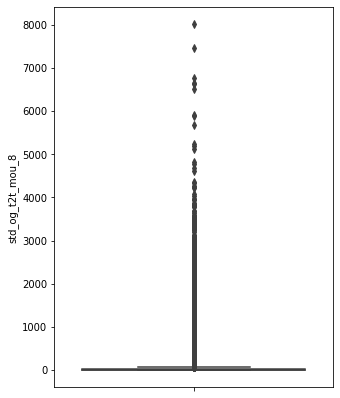

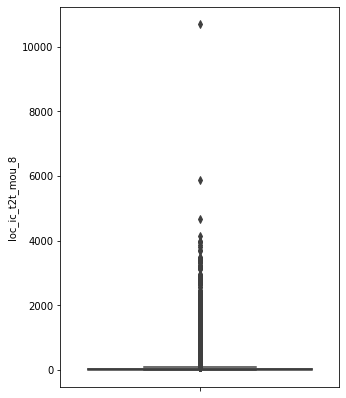

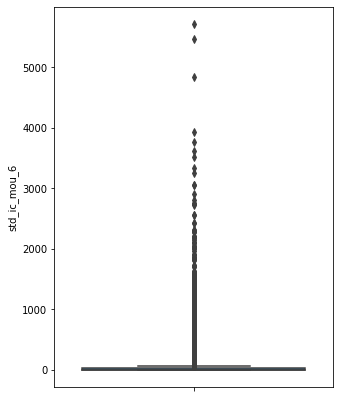

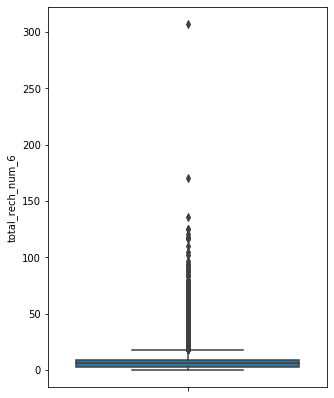

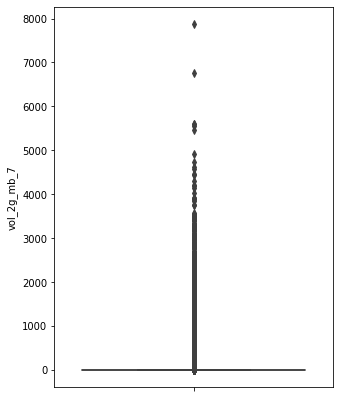

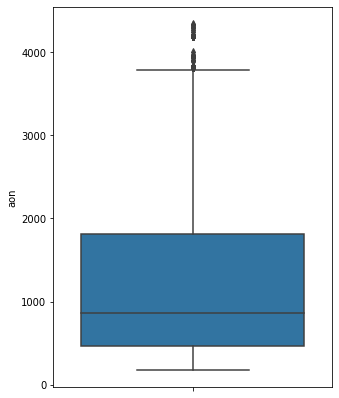

In [33]:
#EDA:-
Random_cols = ['arpu_6','onnet_mou_8','roam_og_mou_6','loc_og_t2t_mou_8','std_og_t2t_mou_8','loc_ic_t2t_mou_8','std_ic_mou_6',
           'total_rech_num_6','vol_2g_mb_7','aon']
for col in Random_cols:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=col, data=m_df)

# Filter high-value customers

In [34]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
m_df['total_data_rech_6'] = m_df.total_rech_data_6 * m_df.av_rech_amt_data_6
m_df['total_data_rech_7'] = m_df.total_rech_data_7 * m_df.av_rech_amt_data_7

In [35]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
m_df['total_rech_6'] = m_df.total_rech_amt_6 + m_df.total_data_rech_6
m_df['total_rech_7'] = m_df.total_rech_amt_7 + m_df.total_data_rech_7

In [36]:
# calculate average recharge done by customer in June and July
m_df['av_amt_6_7'] = (m_df.total_rech_6 + m_df.total_rech_7)/2

In [37]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(m_df.av_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [38]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
m_df = m_df.loc[m_df.av_amt_6_7 >= m_df.av_amt_6_7.quantile(0.7), :]
m_df = m_df.reset_index(drop=True)
m_df.shape

(30001, 203)

## Derive Churn

In [39]:
# calculate total incoming and outgoing minutes of usage
m_df['total_calls_mou_9'] = m_df.total_ic_mou_9 + m_df.total_og_mou_9

In [40]:
# calculate 2g and 3g data consumption
m_df['total_internet_mb_9'] =  m_df.vol_2g_mb_9 + m_df.vol_3g_mb_9

In [41]:
# create churn variable: those who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
m_df['churn'] = m_df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [42]:
# change data type to category
# m_df.churn = m_df.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(m_df.churn.value_counts()*100/m_df.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


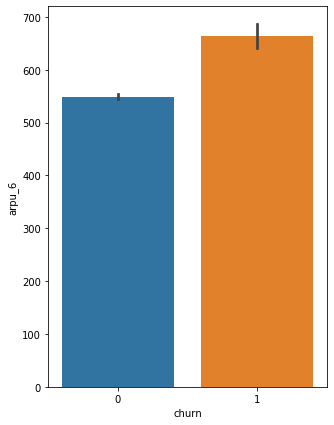

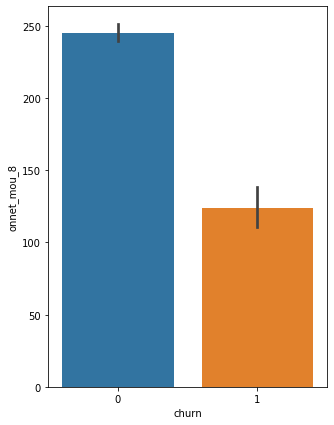

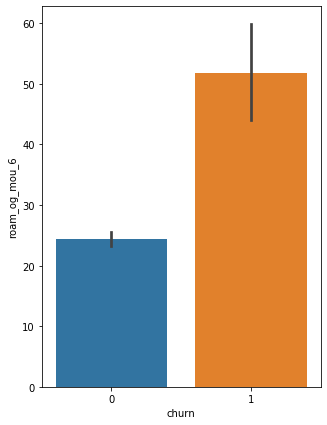

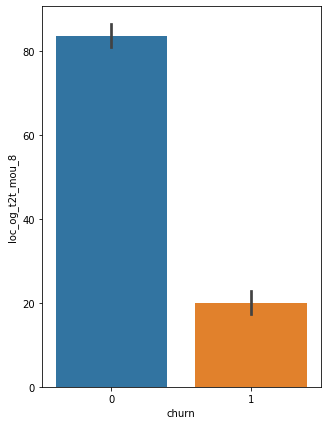

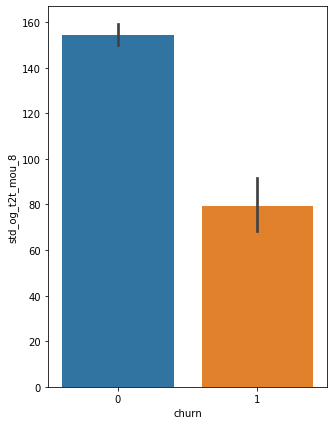

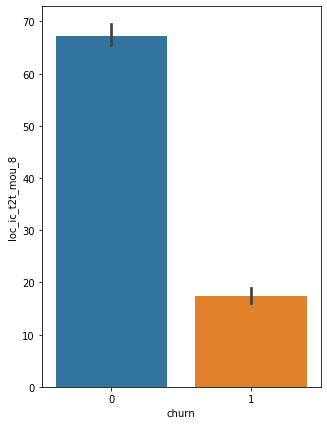

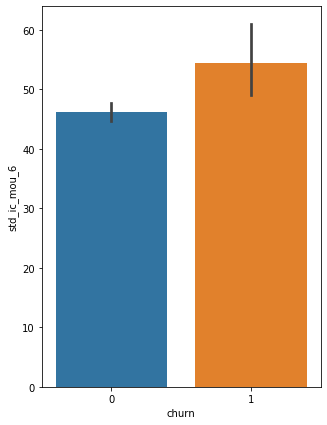

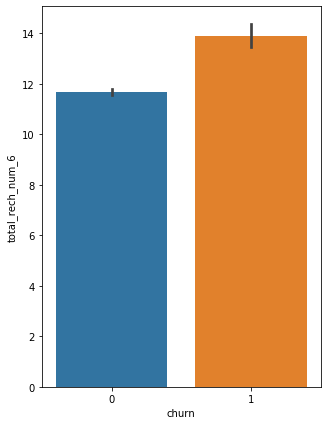

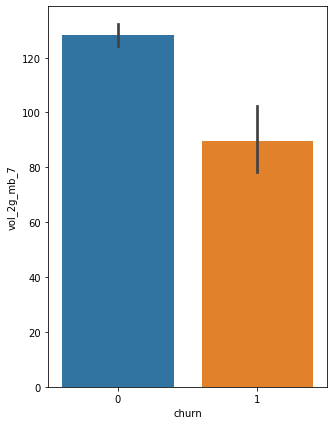

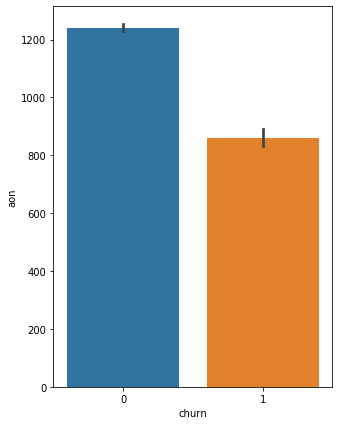

In [43]:
cols = [col for col in m_df.columns if col not in ['churn','mobile_number']]
for col in Random_cols:
    plt.figure(figsize=(5, 7))
    sns.barplot(x='churn', y=col, data=m_df)
    plt.show()

In [44]:
#dropping columns of 9th month data
drop_columns = [x for x in list(m_df) if x.endswith("_9")]
drop_columns += ["sep_vbc_3g"]
m_df = m_df.drop(drop_columns, axis=1)
m_df.shape

(30001, 156)

# EDA

Dropping column that have no varience 

In [45]:
# Identify columns that have no varience
m_df_unique_count = m_df.nunique().sort_values(ascending=False)

# Find columns with all same entries and drop those columns 
m_df_unique_count_one = m_df_unique_count[m_df_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", m_df_unique_count_one)
drop_no_varience_columns = list(m_df_unique_count_one.index)
drop_no_varience_columns += ['mobile_number']
m_df = m_df.drop(drop_no_varience_columns, axis=1)


print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', m_df.shape)

Dataframe Unique Value Count is ONE (all same values): 
 std_og_t2c_mou_8    1
std_og_t2c_mou_7    1
std_og_t2c_mou_6    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
loc_ic_t2o_mou      1
std_og_t2o_mou      1
loc_og_t2o_mou      1
circle_id           1
dtype: int64
Number of columns dropped here  =  11
Dataframe Shape:  (30001, 145)


In [46]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',]
#              'total_rech_num_6',
#              'total_rech_num_7',
#              'total_rech_num_8']
m_df[cat_cols] = m_df[cat_cols].astype('object')

In [47]:
# m_df[cat_cols].dtypes()

# Outlier

In [48]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
m_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,av_amt_6_7,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,261.416302,268.397982,235.378852,375.443534,379.745170,338.682670,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,84.7

In [49]:
m_df.shape

(30001, 145)

In [50]:
#listing the column that has outliers
num_out = list(m_df.select_dtypes(include=['int64', 'float64']).columns)

***As we are building Model on usage of voice and data.Hence not treating the outliers.***

In [55]:
m_df.shape

(30001, 145)

## Derived columns

Creating derived colums
1. Average values of 3 months for each attributes were created to check if that value could address all the months.Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline
2. The AON variable was used to create tenure buckets. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [56]:
m_df['Average_usage'] = m_df[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
m_df['Average_usage'] = m_df['Average_usage'].map(lambda x: 1 if x == 0 else 0)
#After deriving dropping off the original columns
m_df = m_df.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)



m_df['aon'] = m_df['aon'].astype('int64')
m_df['Customer_Age'] = pd.cut(m_df['aon'], range(0,m_df['aon'].max()+365,365), labels=range(0,int(round(m_df['aon'].max()/365))))
m_df['Customer_Age'] = m_df['Customer_Age'].astype('int64')
m_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,av_amt_6_7,churn,Average_usage,Customer_Age
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,1,1,968,30.40,0.00,101.20,252.0,252.0,614.0,504.0,559.0,1,0,2
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,802,57.74,19.38,18.74,0.0,0.0,1580.0,790.0,1185.0,1,1,2
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16

In [57]:
m_df.shape

(30001, 141)

## Dummies

In [58]:
# col = list(m_df.select_dtypes(include='object').columns)
m_df = pd.get_dummies(m_df, drop_first=True)

In [59]:
m_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,av_amt_6_7,churn,Average_usage,Customer_Age,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968,30.40,0.00,101.20,252.0,252.0,614.0,504.0,559.0,1,0,2,1,0,1,0,1,0,0,1,0,1,0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.0,0.0,1580.0,790.0,1185.0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.

In [60]:
m_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 147 columns):
 #   Column                Dtype  
---  ------                -----  
 0   arpu_6                float64
 1   arpu_7                float64
 2   arpu_8                float64
 3   onnet_mou_6           float64
 4   onnet_mou_7           float64
 5   onnet_mou_8           float64
 6   offnet_mou_6          float64
 7   offnet_mou_7          float64
 8   offnet_mou_8          float64
 9   roam_ic_mou_6         float64
 10  roam_ic_mou_7         float64
 11  roam_ic_mou_8         float64
 12  roam_og_mou_6         float64
 13  roam_og_mou_7         float64
 14  roam_og_mou_8         float64
 15  loc_og_t2t_mou_6      float64
 16  loc_og_t2t_mou_7      float64
 17  loc_og_t2t_mou_8      float64
 18  loc_og_t2m_mou_6      float64
 19  loc_og_t2m_mou_7      float64
 20  loc_og_t2m_mou_8      float64
 21  loc_og_t2f_mou_6      float64
 22  loc_og_t2f_mou_7      float64
 23  loc_og_t2f

In [61]:
m_df.shape

(30001, 147)

# Data Imbalance

Total Churn Count     = 2441
Total Not-Churn Count = 27560
Churn Rate            = 8.14%


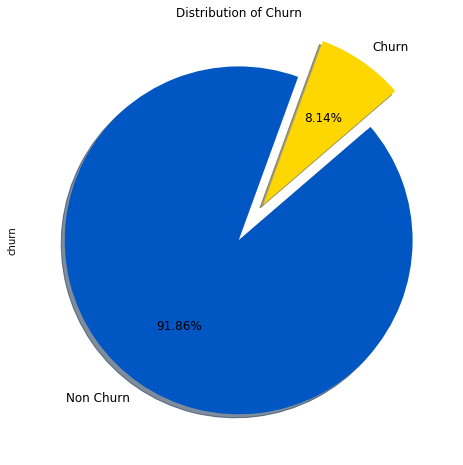

In [62]:
#checking whether data is imbalanced or not
churn  = m_df["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])
print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

plt.figure(figsize=(16,8))
m_df["churn"].value_counts().plot.pie(autopct = "%1.2f%%",fontsize = 12,
colors = sns.color_palette("prism",3),labels=["Non Churn","Churn"],explode=[0,0.25],shadow =True,startangle=70)

# explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors,labels=labels, fontsize=12, )
plt.title("Distribution of Churn")
plt.show()

There is a class imbalance in curn event rate

We will be using class_weight = 'balanced'

## Model

In [63]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = m_df.drop(['churn'],axis=1)

# Putting response variable to y
y = m_df['churn']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

In [65]:
X_train.shape

(21000, 146)

In [66]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,av_amt_6_7,Average_usage,Customer_Age,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
11785,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,26.66,31.11,6.13,14.38,9.86,5.39,7.39,4.84,21.63,30.58,19.81,1.19,0.00,0.00,0.0,6.40,1.10,28.23,37.98,24.66,0.00,0.00,0.00,2.61,10.89,13.26,0.00,0.00,0.00,2.61,10.89,13.26,120.61,95.48,54.01,0.00,8.55,1.10,0.00,0.0,0.0,151.46,152.91,93.04,15.29,35.24,46.11,134.14,140.98,105.54,7.18,9.74,2.18,156.63,185.98,153.84,0.00,0.00,0.00,17.44,32.93,57.56,0.00,0.00,0.00,17.44,32.93,57.56,433.09,356.41,266.61,0.00,0.0,0.0,259.01,135.48,55.19,0.00,2.01,0.00,8.0,5.0,3.0,1481.0,892.0,658.0,398.0,459.0,229.0,398.0,35.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3651,0.00,0.00,0.00,0.0,0.0,1481.0,892.0,1186.5,1,10,0,0,0,0,0,0,0,0,0,0,0,0
11987,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,0.00,0.00,0.00,0.00,0.00,64.46,30.58,40.71,277.44,179.54,211.56,12.14,5.18,34.54,0.0,16.51,0.00,354.06,215.31,286.83,80.43,19.26,0.00,31.54,19.59,19.29,0.00,6.78,0.00,111.98,45.64,19.29,0.00,0.00,0.00,0.00,16.51,0.00,0.00,0.0,0.0,466.04,277.48,306.13,27.43,21.46,36.66,143.86,204.43,242.16,91.86,57.33,13.73,263.16,283.23,292.56,15.63,14.01,0.00,29.08,28.99,22.28,35.48,3.90,0.00,80.19,46.91,22.28,402.46,342.28,320.68,0.00,0.0,0.0,52.03,10.75,5.64,7.06,1.38,0.18,8.0,7.0,5.0,576.0,393.0,488.0,110.0,120.0,130.0,110.0,98.0,130.0,2.0,3.0,1.0,98.0,98.0,98.0,196.0,148.0,98.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2347,184.09,147.56,274.99,392.0,444.0,968.0,837.0,902.5,0,6,1,0,1,0,1,0,0,1,0,1,0,1
11648,298.315,314.180,313.407,69.33,77.09,83.28,333.28,298.38,213.34,17.73,42.28,68.41,22.99,21.33,76.69,21.54,11.61,26.54,210.16,218.54,127.33,3.13,6.98,0.00,0.0,0.00,0.00,234.84,237.14,153.88,43.54,61.19,27.16,101.21,55.79,38.88,0.00,0.00,0.00,144.76,116.99,66.04,0.00,0.16,0.00,0.00,0.00,0.0

In [67]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [68]:
#listing the column that has outliers
num_out = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_out

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[num_out] = scaler.fit_transform(X_train[num_out])
X_test[num_out] = scaler.transform(X_test[num_out])

In [70]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,av_amt_6_7,Average_usage,Customer_Age,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
11785,1.115484,0.688737,0.152667,-0.559312,-0.543098,-0.501847,-0.466187,-0.442957,-0.498493,0.166015,0.177751,0.252122,-0.178395,-0.062395,-0.095051,-0.348812,-0.324844,-0.318853,-0.565943,-0.549298,-0.569585,-0.227853,-0.290731,-0.304296,-0.254831,0.482122,-0.077536,-0.600265,-0.580504,-0.582545,-0.411127,-0.413976,-0.373254,-0.433608,-0.407852,-0.350906,-0.156374,-0.141659,-0.143638,-0.567690,-0.550899,-0.481454,2.238915,1.762919,0.997135,-0.326117,0.065368,-0.272720,-0.140957,-0.01516,-0.016828,-0.665728,-0.661873,-0.650555,-0.307478,-0.189593,-0.106247,-0.085248,-0.059517,-0.202093,-0.178038,-0.128034,-0.280444,-0.244727,-0.161955,-0.238383,-0.184858,-0.179917,-0.191835,-0.117708,0.019601,0.279223,-0.135600,-0.136123,-0.124243,-0.208529,-0.107943,0.091271,0.378162,0.154991,-0.037517,-0.308577,-0.13577,-0.234992,3.273325,1.628862,0.689833,-0.074812,0.027293,-0.088662,-0.415802,-0.717597,-0.751786,1.415590,0.373331,0.109025,1.293454,1.573734,0.391372,2.047579,-0.456642,0.716280,-0.587543,-0.598072,-0.541753,-0.694135,-0.700252,-0.656217,-0.664112,-0.670667,-0.623153,-0.401189,-0.408175,-0.376513,-0.423358,-0.442850,-0.416085,-0.360796,-0.34396,-0.343262,-0.211037,-0.207517,-0.184095,2.582178,-0.401980,-0.400504,-0.382233,-0.364843,-0.356511,0.269632,-0.184180,0.024772,0.960128,2.729081,0,0,0,0,0,0,0,0,0,0,0,0
11987,-0.096775,-0.500253,-0.275833,-0.253700,-0.456323,-0.423795,-0.113343,-0.306586,-0.151667,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.091015,-0.229737,-0.164608,0.440469,0.063247,0.250323,0.253079,-0.057653,1.482865,-0.254831,1.558365,-0.224949,0.253166,-0.111422,0.132197,-0.209983,-0.368013,-0.373254,-0.362007,-0.387956,-0.336276,-0.156374,0.374211,-0.143638,-0.385932,-0.496792,-0.471601,-0.044048,-0.043860,-0.040774,-0.326117,0.425045,-0.327945,-0.140957,-0

In [71]:
X_train_copy.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,av_amt_6_7,Average_usage,Customer_Age,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
11785,1086.343,910.298,592.623,5.69,8.28,4.84,151.89,159.01,98.06,28.96,26.66,31.11,6.13,14.38,9.86,5.39,7.39,4.84,21.63,30.58,19.81,1.19,0.00,0.00,0.0,6.40,1.10,28.23,37.98,24.66,0.00,0.00,0.00,2.61,10.89,13.26,0.00,0.00,0.00,2.61,10.89,13.26,120.61,95.48,54.01,0.00,8.55,1.10,0.00,0.0,0.0,151.46,152.91,93.04,15.29,35.24,46.11,134.14,140.98,105.54,7.18,9.74,2.18,156.63,185.98,153.84,0.00,0.00,0.00,17.44,32.93,57.56,0.00,0.00,0.00,17.44,32.93,57.56,433.09,356.41,266.61,0.00,0.0,0.0,259.01,135.48,55.19,0.00,2.01,0.00,8.0,5.0,3.0,1481.0,892.0,658.0,398.0,459.0,229.0,398.0,35.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3651,0.00,0.00,0.00,0.0,0.0,1481.0,892.0,1186.5,1,10,0,0,0,0,0,0,0,0,0,0,0,0
11987,513.359,311.602,364.126,144.89,49.84,40.71,321.14,227.63,265.41,0.00,0.00,0.00,0.00,0.00,0.00,64.46,30.58,40.71,277.44,179.54,211.56,12.14,5.18,34.54,0.0,16.51,0.00,354.06,215.31,286.83,80.43,19.26,0.00,31.54,19.59,19.29,0.00,6.78,0.00,111.98,45.64,19.29,0.00,0.00,0.00,0.00,16.51,0.00,0.00,0.0,0.0,466.04,277.48,306.13,27.43,21.46,36.66,143.86,204.43,242.16,91.86,57.33,13.73,263.16,283.23,292.56,15.63,14.01,0.00,29.08,28.99,22.28,35.48,3.90,0.00,80.19,46.91,22.28,402.46,342.28,320.68,0.00,0.0,0.0,52.03,10.75,5.64,7.06,1.38,0.18,8.0,7.0,5.0,576.0,393.0,488.0,110.0,120.0,130.0,110.0,98.0,130.0,2.0,3.0,1.0,98.0,98.0,98.0,196.0,148.0,98.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2347,184.09,147.56,274.99,392.0,444.0,968.0,837.0,902.5,0,6,1,0,1,0,1,0,0,1,0,1,0,1
11648,298.315,314.180,313.407,69.33,77.09,83.28,333.28,298.38,213.34,17.73,42.28,68.41,22.99,21.33,76.69,21.54,11.61,26.54,210.16,218.54,127.33,3.13,6.98,0.00,0.0,0.00,0.00,234.84,237.14,153.88,43.54,61.19,27.16,101.21,55.79,38.88,0.00,0.00,0.00,144.76,116.99,66.04,0.00,0.16,0.00,0.00,0.00,0.0

## PCA

In [72]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
X_train_1 = pca.fit_transform(X_train_copy)
# pca.fit(X_train)

In [73]:
pca.components_

array([[ 4.92975085e-02,  6.33162824e-02,  5.41179747e-02, ...,
         4.82205402e-05, -4.12247090e-06,  4.51776194e-05],
       [ 1.49594808e-01,  1.74979828e-01,  1.74576404e-01, ...,
        -1.04976032e-04,  1.79757292e-05, -8.41066565e-05],
       [ 9.79229233e-02, -1.08675743e-02,  1.58909499e-02, ...,
        -1.70757852e-05, -3.43259716e-06, -1.26504296e-06],
       ...,
       [ 0.00000000e+00, -1.90607493e-18, -6.86342651e-19, ...,
         1.45859563e-01, -1.38438010e-01, -1.38438010e-01],
       [-0.00000000e+00, -1.02587246e-18, -1.51182233e-18, ...,
        -3.07098369e-01,  2.56067150e-01,  2.56067150e-01],
       [-0.00000000e+00,  1.06326304e-20, -1.40144497e-18, ...,
         2.49848333e-02, -2.84387673e-01, -2.84387673e-01]])

In [74]:
pca.explained_variance_ratio_

array([3.93033022e-01, 1.75581566e-01, 9.47441666e-02, 7.11225552e-02,
       4.15674434e-02, 3.73942533e-02, 3.50008626e-02, 2.99106687e-02,
       1.98780357e-02, 1.82074130e-02, 1.37914152e-02, 7.39103509e-03,
       6.16792510e-03, 5.59083260e-03, 4.64152037e-03, 4.55068869e-03,
       3.96480302e-03, 3.28649979e-03, 3.12833888e-03, 2.79083936e-03,
       2.68961670e-03, 2.56831989e-03, 2.43759531e-03, 2.15147670e-03,
       1.91403557e-03, 1.54225437e-03, 1.49258245e-03, 1.21274283e-03,
       1.09132813e-03, 1.00760200e-03, 7.96936085e-04, 7.03379986e-04,
       6.42533645e-04, 6.07617450e-04, 5.34839275e-04, 5.20865687e-04,
       4.98697052e-04, 4.76741304e-04, 4.39435473e-04, 4.17470712e-04,
       4.06263333e-04, 3.80303467e-04, 3.69510511e-04, 3.45611326e-04,
       2.95955481e-04, 2.92213278e-04, 2.62657783e-04, 2.50601789e-04,
       2.43225988e-04, 2.16227708e-04, 1.72630335e-04, 1.64805308e-04,
       1.23895965e-04, 1.01099433e-04, 8.57590877e-05, 8.26325762e-05,
      

In [75]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

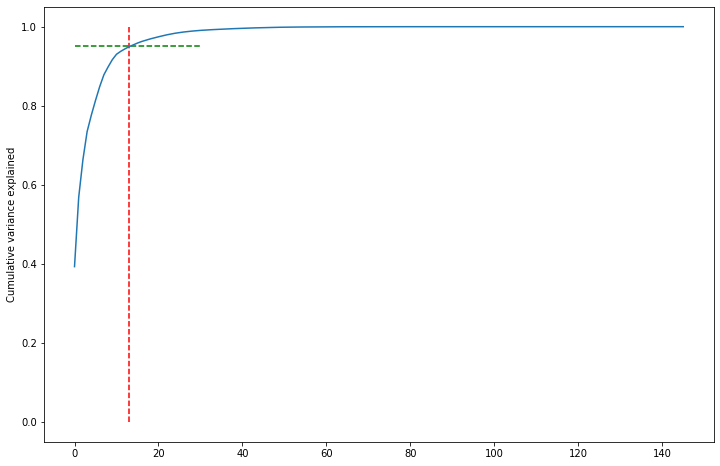

In [76]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=13, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [77]:
from sklearn.decomposition import IncrementalPCA

In [78]:
pca_final = IncrementalPCA(n_components=13)

In [79]:
df_train_pca = pca_final.fit_transform(X_train_copy)

In [80]:
df_train_pca.shape

(21000, 13)

In [81]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [82]:
corrmat.shape

(13, 13)

In [83]:
df_test_pca = pca_final.transform(X_test_copy)
df_test_pca.shape

(9001, 13)

## Decision Tree

In [84]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'class_weight': [{0:0.08, 1: 0.92}, 'balanced'],
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   29.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [{0: 0.08, 1: 0.92}, 'balanced'],
   

In [85]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.221890,0.046054,0.001005,0.000009,"{0: 0.08, 1: 0.92}",entropy,5,50,50,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.788333,0.801190,0.784048,0.666190,0.763333,0.760619,0.048759,5
1,0.176188,0.002534,0.000987,0.000017,"{0: 0.08, 1: 0.92}",entropy,5,50,100,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.788333,0.801190,0.784048,0.666190,0.763333,0.760619,0.048759,5
2,0.169178,0.001368,0.000992,0.000015,"{0: 0.08, 1: 0.92}",entropy,5,100,50,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.785952,0.799048,0.772857,0.668810,0.765476,0.758429,0.046253,13
3,0.167218,0.003596,0.001003,0.000019,"{0: 0.08, 1: 0.92}",entropy,5,100,100,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.785952,0.799048,0.772857,0.668810,0.765476,0.758429,0.046253,13
4,0.264775,0.005109,0.000999,0.000020,"{0: 0.08, 1: 0.92}",entropy,10,50,50,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.769762,0.758333,0.759286,0.743095,0.792143,0.764524,0.016218,3
5,0.263391,0.002966,0.001021,0.000012,"{0: 0.08, 1: 0.92}",entropy,10,50,100,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.769286,0.758333,0.759286,0.743095,0.790238,0.764048,0.015542,4
6,0.244977,0.003073,0.000991,0.000009,"{0: 0.08, 1: 0.92}",entropy,10,100,50,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.764048,0.742857,0.749524,0.738571,0.755476,0.750095,0.009046,21
7,0.243175,0.003980,0.000996,0.000023,"{0: 0.08, 1: 0.92}",entropy,10,100,100,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.764048,0.742857,0.749524,0.738571,0.755476,0.750095,0.009046,21
8,0.111416,0.001506,0.000984,0.000027,"{0: 0.08, 1: 0.92}",gini,5,50,50,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.736190,0.730000,0.792381,0.669524,0.669286,0.719476,0.046302,29
9,0.113798,0.000925,0.000803,0.000402,"{0: 0.08, 1: 0.92}",gini,5,50,100,"{'class_weight': {0: 0.08, 1: 0.92}, 'criterio...",0.736190,0.730000,0.792381,0.669524,0.669286,0.719476,0.046302,29


In [86]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.767
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


In [87]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy",
                                  class_weight='balanced',
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(df_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=100, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')

In [88]:
# accuracy score
clf_gini.score(df_test_pca,y_test)

0.777469170092212

In [89]:
# predict
predictions = clf_gini.predict(df_test_pca)

In [90]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      8251
           1       0.24      0.75      0.36       750

    accuracy                           0.78      9001
   macro avg       0.60      0.77      0.61      9001
weighted avg       0.91      0.78      0.82      9001



In [92]:
confusion = confusion_matrix(y_test,predictions)
confusion

array([[6432, 1819],
       [ 184,  566]], dtype=int64)

In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,predictions))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.777469170092212
Sensitivity:  0.7546666666666667
Specificity:  0.7795418737122773
false postive rate:  0.2204581262877227
positive predictive value:  0.23731656184486374
Negative predictive value:  0.9721886336154776


## Random Forest

In [94]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300],
    'class_weight': [{0:0.08, 1: 0.92}, 'balanced'],
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [95]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 45.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [96]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8222380952380952 using {'class_weight': {0: 0.08, 1: 0.92}, 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [104]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             class_weight={0: 0.08, 1: 0.92},
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [105]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.08, 1: 0.92}, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [106]:
# predict
predictions = rfc.predict(df_test_pca)

In [107]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8251
           1       0.30      0.78      0.43       750

    accuracy                           0.83      9001
   macro avg       0.64      0.81      0.66      9001
weighted avg       0.92      0.83      0.86      9001



In [109]:
confusion = confusion_matrix(y_test,predictions)
confusion

array([[6861, 1390],
       [ 166,  584]], dtype=int64)

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,predictions))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.8271303188534608
Sensitivity:  0.7786666666666666
Specificity:  0.8315355714458853
false postive rate:  0.16846442855411464
positive predictive value:  0.29584599797365757
Negative predictive value:  0.9763768322185855


## Logistic regression with PCA

In [111]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
X_train_1 = pca.fit_transform(X_train)
# pca.fit(X_train)

In [112]:
pca.components_

array([[ 1.48065630e-01,  1.53788548e-01,  1.46109640e-01, ...,
        -6.62738823e-02,  8.74131534e-03, -5.59697036e-02],
       [ 6.88204276e-02,  6.80292212e-02,  8.09038891e-02, ...,
         5.80729751e-02, -6.59786890e-03,  6.05619522e-02],
       [ 1.36937895e-01,  1.64402045e-01,  1.54357039e-01, ...,
         3.18667482e-02, -3.82876539e-05,  3.60132117e-02],
       ...,
       [-0.00000000e+00, -2.61551287e-17,  1.55341519e-16, ...,
         3.65781369e-02,  1.00234537e-01,  1.00234537e-01],
       [-0.00000000e+00, -4.06286613e-17, -6.67965325e-17, ...,
        -2.83337780e-01,  2.84777633e-01,  2.84777633e-01],
       [-0.00000000e+00, -2.14431155e-16,  3.67461435e-16, ...,
        -1.58860113e-02,  4.05596796e-02,  4.05596796e-02]])

In [113]:
pca.explained_variance_ratio_

array([1.09456707e-01, 8.89216767e-02, 6.86283555e-02, 5.10920136e-02,
       4.37128832e-02, 3.55166805e-02, 3.05143981e-02, 2.76028386e-02,
       2.51384340e-02, 2.35853822e-02, 2.13827914e-02, 2.08356418e-02,
       2.02814981e-02, 1.96299002e-02, 1.80411654e-02, 1.70134420e-02,
       1.53752060e-02, 1.46646439e-02, 1.43189334e-02, 1.38024014e-02,
       1.33093415e-02, 1.30748378e-02, 1.25271824e-02, 1.14103019e-02,
       1.11793270e-02, 1.11339104e-02, 1.01784130e-02, 9.17807658e-03,
       8.65683623e-03, 8.48615086e-03, 8.03471847e-03, 7.90980269e-03,
       7.42108886e-03, 7.05089344e-03, 6.97433851e-03, 6.89209369e-03,
       6.45034219e-03, 6.19217027e-03, 6.14810435e-03, 5.96547910e-03,
       5.62690685e-03, 5.35143938e-03, 5.10162714e-03, 4.95934602e-03,
       4.76745427e-03, 4.33972721e-03, 4.25361579e-03, 4.05201497e-03,
       3.99848337e-03, 3.95734193e-03, 3.57512452e-03, 3.49168572e-03,
       3.39816409e-03, 3.28374873e-03, 3.23525074e-03, 3.07820954e-03,
      

In [114]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

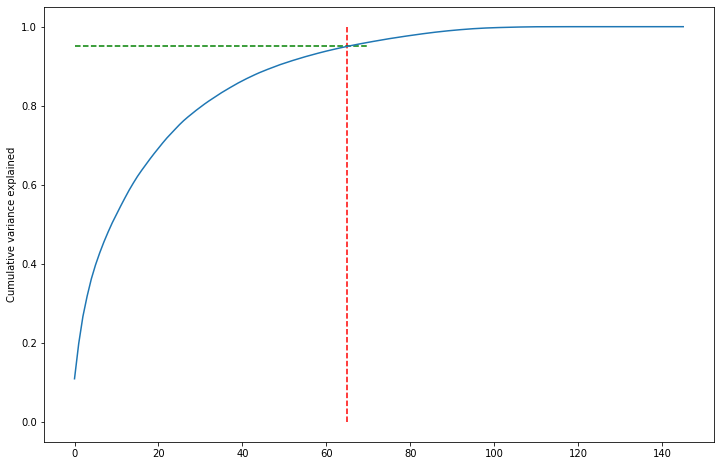

In [115]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=70, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [116]:
from sklearn.decomposition import IncrementalPCA

In [117]:
pca_final = IncrementalPCA(n_components=65)

In [118]:
df_train_pca = pca_final.fit_transform(X_train)

In [119]:
df_train_pca.shape

(21000, 65)

In [120]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(65, 65)

In [121]:
df_test_pca = pca_final.transform(X_test)

In [122]:
df_test_pca.shape

(9001, 65)

In [123]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')
lr0.fit(df_train_pca, y_train)

y_pred = lr0.predict(df_test_pca)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy 0.8129096767025886
Sensitivity 0.836


In [124]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2], 'penalty' :['l1', 'l2'] , 'class_weight'  : [{0:0.08, 1: 0.92}, 'balanced']}
algo = LogisticRegression()

model = GridSearchCV(estimator = algo, param_grid = params, scoring = 'recall')
model.fit(df_train_pca, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1,
                               2],
                         'class_weight': [{0: 0.08, 1: 0.92}, 'balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', 

In [125]:
model.best_score_

0.827899670105252

In [126]:
model.best_params_

{'C': 0.1, 'class_weight': {0: 0.08, 1: 0.92}, 'penalty': 'l2'}

In [127]:
logreg = LogisticRegression(penalty = 'l2', solver = 'saga', class_weight = {0:0.08, 1: 0.92}, C = 0.1)
logreg.fit(df_train_pca, y_train)

y_pred = logreg.predict(df_test_pca)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy 0.7740251083212977
Sensitivity 0.848


In [128]:
#Making prediction on the test data
pred_test = logreg.predict_proba(df_test_pca)
y_pred_default = logreg.predict(df_test_pca)

In [129]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      8251
           1       0.25      0.85      0.38       750

    accuracy                           0.77      9001
   macro avg       0.62      0.81      0.62      9001
weighted avg       0.92      0.77      0.82      9001

[[6331 1920]
 [ 114  636]]
accuracy_score :  0.7740251083212977


In [130]:
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [131]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8856967640286025


In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

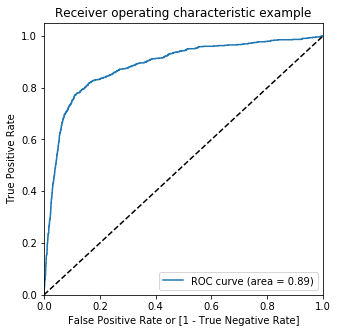

In [133]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.699123,1,1,1,1,1,1,1,0,0,0
1,1,0.475269,1,1,1,1,1,0,0,0,0,0
2,0,0.216522,1,1,1,0,0,0,0,0,0,0
3,0,0.431110,1,1,1,1,1,0,0,0,0,0
4,1,0.792906,1,1,1,1,1,1,1,1,0,0


In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083324  0.000000  1.000000
0.1   0.1  0.241529  0.174040  0.984000
0.2   0.2  0.405955  0.355351  0.962667
0.3   0.3  0.550717  0.515331  0.940000
0.4   0.4  0.674036  0.653860  0.896000
0.5   0.5  0.774025  0.767301  0.848000
0.6   0.6  0.851794  0.856866  0.796000
0.7   0.7  0.900233  0.917465  0.710667
0.8   0.8  0.920120  0.957823  0.505333
0.9   0.9  0.921120  0.989577  0.168000


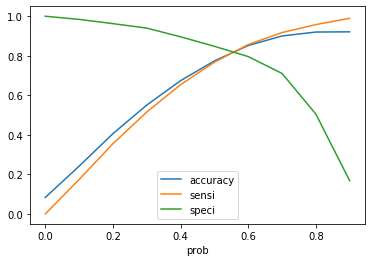

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [137]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5614182999568686]


In [138]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.56 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.56 else 0)

y_pred_final.churn.value_counts()

0    8251
1     750
Name: churn, dtype: int64

In [139]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6801, 1450],
       [ 129,  621]], dtype=int64)

In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.7740251083212977
Sensitivity:  0.828
Specificity:  0.8242637256090171
false postive rate:  0.1757362743909829
positive predictive value:  0.2998551424432641
Negative predictive value:  0.9813852813852814


## Logistic Regression without PCA

In [141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 10 
rfe = rfe.fit(X_train, y_train)
# print(rfe.support_)           # Printing the boolean results
# print(rfe.ranking_)           # Printing the ranking

In [142]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 28),
 ('arpu_7', True, 1),
 ('arpu_8', False, 12),
 ('onnet_mou_6', False, 93),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 54),
 ('offnet_mou_7', False, 41),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 79),
 ('roam_ic_mou_7', False, 101),
 ('roam_ic_mou_8', False, 124),
 ('roam_og_mou_6', False, 58),
 ('roam_og_mou_7', False, 33),
 ('roam_og_mou_8', False, 20),
 ('loc_og_t2t_mou_6', False, 55),
 ('loc_og_t2t_mou_7', False, 100),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 56),
 ('loc_og_t2m_mou_7', False, 40),
 ('loc_og_t2m_mou_8', False, 18),
 ('loc_og_t2f_mou_6', False, 114),
 ('loc_og_t2f_mou_7', False, 132),
 ('loc_og_t2f_mou_8', False, 130),
 ('loc_og_t2c_mou_6', False, 81),
 ('loc_og_t2c_mou_7', False, 105),
 ('loc_og_t2c_mou_8', False, 82),
 ('loc_og_mou_6', False, 91),
 ('loc_og_mou_7', False, 96),
 ('loc_og_mou_8', False, 27),
 ('std_og_t2t_mou_6', False, 52),
 ('std_og_t2t_mou_7', True, 1),
 (

In [143]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8',
       'std_og_t2t_mou_7', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8',
       'total_rech_amt_8', 'night_pck_user_6_1.0', 'fb_user_8_1.0'],
      dtype='object')

In [144]:
# #Checking the Correlation 
# plt.figure(figsize =(16,8))
# c=X_train[col].corr()
# ax = sns.heatmap(c, annot=True) 
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)
# plt.show()

In [145]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3784.4
Date:                Mon, 16 Mar 2020   Deviance:                       7568.8
Time:                        21:37:34   Pearson chi2:                 1.20e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.1537      0.069    -45.838      0.000      -3.289      -3.019
arpu_7                   0.5937      0.052     11.477      0.000       0.492       0.695
onnet_mou_7              0.4336      0.124      3.493      0.000       0.190       0.677
onnet_mou_8              0.5892      0.137      4.294      0.000       0.320       0.858
offnet_mou_8             0.6818      0.130      5.249      0.000       0.427       0.936
std_og_t2t_mou_7        -0.2915      0.109     -2.664      0.008      -0.506      -0.077
std_og_mou_8             1.2384      0.225      5.500      0.000       0.797       1.680
total_og_mou_8          -2.7955      0.272    -10.279      0.000      -3.329      -2.262
loc_ic_mou_7             0.5413      0.070      7.680      0.000       0.403       0.679
loc_ic_mou_8             6.4021      0.314     20.403      0.000       5.787       7.017
std_ic_mou_8             3.6156      0.171     21.196      0.000       3.281       3.950
total_ic_mou_8          -9.7070      0.381    -25.469      0.000     -10.454      -8.960
isd_ic_mou_8             1.7585      0.080     22.049      0.000       1.602       1.915
total_rech_amt_8        -0.7753      0.094     -8.237      0.000      -0.960      -0.591
night_pck_user_6_1.0     0.4261      0.250      1.705      0.088      -0.064       0.916
fb_user_8_1.0           -1.6193      0.083    -19.445      0.000      -1.783      -1.456
========================================================================================
"""

In [146]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [147]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_ic_mou_8,248.97
8,loc_ic_mou_8,183.94
6,total_og_mou_8,52.17
9,std_ic_mou_8,39.38
3,offnet_mou_8,24.67
2,onnet_mou_8,24.36
11,isd_ic_mou_8,9.48
1,onnet_mou_7,8.07
5,std_og_mou_8,7.42
4,std_og_t2t_mou_7,6.58


In [148]:
col = col.drop('night_pck_user_6_1.0')

In [149]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3785.8
Date:                Mon, 16 Mar 2020   Deviance:                       7571.5
Time:                        21:37:35   Pearson chi2:                 1.20e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.1504      0.069    -45.798      0.000      -3.285      -3.016
arpu_7               0.5948      0.052     11.497      0.000       0.493       0.696
onnet_mou_7          0.4288      0.124      3.454      0.001       0.185       0.672
onnet_mou_8          0.5903      0.137      4.301      0.000       0.321       0.859
offnet_mou_8         0.6811      0.130      5.239      0.000       0.426       0.936
std_og_t2t_mou_7    -0.2886      0.109     -2.637      0.008      -0.503      -0.074
std_og_mou_8         1.2359      0.225      5.491      0.000       0.795       1.677
total_og_mou_8      -2.7936      0.272    -10.271      0.000      -3.327      -2.260
loc_ic_mou_7         0.5402      0.070      7.665      0.000       0.402       0.678
loc_ic_mou_8         6.3898      0.313     20.390      0.000       5.776       7.004
std_ic_mou_8         3.6118      0.170     21.201      0.000       3.278       3.946
total_ic_mou_8      -9.6951      0.381    -25.466      0.000     -10.441      -8.949
isd_ic_mou_8         1.7557      0.080     22.022      0.000       1.599       1.912
total_rech_amt_8    -0.7764      0.094     -8.250      0.000      -0.961      -0.592
fb_user_8_1.0       -1.6124      0.083    -19.387      0.000      -1.775      -1.449
====================================================================================
"""

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_ic_mou_8,248.97
8,loc_ic_mou_8,183.93
6,total_og_mou_8,52.17
9,std_ic_mou_8,39.38
3,offnet_mou_8,24.67
2,onnet_mou_8,24.36
11,isd_ic_mou_8,9.48
1,onnet_mou_7,8.07
5,std_og_mou_8,7.42
4,std_og_t2t_mou_7,6.58


In [151]:
col = col.drop('total_ic_mou_8')

In [152]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4124.9
Date:                Mon, 16 Mar 2020   Deviance:                       8249.9
Time:                        21:37:36   Pearson chi2:                 3.08e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2000      0.069    -46.523      0.000      -3.335      -3.065
arpu_7               0.5799      0.054     10.709      0.000       0.474       0.686
onnet_mou_7          0.3166      0.129      2.450      0.014       0.063       0.570
onnet_mou_8          1.6140      0.141     11.423      0.000       1.337       1.891
offnet_mou_8         1.7445      0.137     12.726      0.000       1.476       2.013
std_og_t2t_mou_7    -0.2546      0.114     -2.234      0.025      -0.478      -0.031
std_og_mou_8         2.6235      0.253     10.375      0.000       2.128       3.119
total_og_mou_8      -5.7988      0.288    -20.160      0.000      -6.363      -5.235
loc_ic_mou_7         0.2360      0.061      3.852      0.000       0.116       0.356
loc_ic_mou_8        -0.7510      0.117     -6.405      0.000      -0.981      -0.521
std_ic_mou_8        -0.2795      0.084     -3.332      0.001      -0.444      -0.115
isd_ic_mou_8        -0.0065      0.044     -0.147      0.883      -0.093       0.080
total_rech_amt_8    -1.4646      0.113    -12.907      0.000      -1.687      -1.242
fb_user_8_1.0       -1.6122      0.081    -19.919      0.000      -1.771      -1.454
====================================================================================
"""

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,50.54
3,offnet_mou_8,24.06
2,onnet_mou_8,23.77
1,onnet_mou_7,8.07
5,std_og_mou_8,7.41
4,std_og_t2t_mou_7,6.58
8,loc_ic_mou_8,3.71
7,loc_ic_mou_7,3.49
11,total_rech_amt_8,3.46
0,arpu_7,3.05


In [154]:
col = col.drop('isd_ic_mou_8')

In [155]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4125.0
Date:                Mon, 16 Mar 2020   Deviance:                       8249.9
Time:                        21:37:36   Pearson chi2:                 3.07e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.2002      0.069    -46.533      0.000      -3.335      -3.065
arpu_7               0.5800      0.054     10.711      0.000       0.474       0.686
onnet_mou_7          0.3167      0.129      2.451      0.014       0.063       0.570
onnet_mou_8          1.6149      0.141     11.442      0.000       1.338       1.892
offnet_mou_8         1.7454      0.137     12.748      0.000       1.477       2.014
std_og_t2t_mou_7    -0.2546      0.114     -2.234      0.025      -0.478      -0.031
std_og_mou_8         2.6242      0.253     10.378      0.000       2.129       3.120
total_og_mou_8      -5.8006      0.287    -20.181      0.000      -6.364      -5.237
loc_ic_mou_7         0.2359      0.061      3.850      0.000       0.116       0.356
loc_ic_mou_8        -0.7512      0.117     -6.407      0.000      -0.981      -0.521
std_ic_mou_8        -0.2802      0.084     -3.343      0.001      -0.444      -0.116
total_rech_amt_8    -1.4654      0.113    -12.931      0.000      -1.688      -1.243
fb_user_8_1.0       -1.6121      0.081    -19.920      0.000      -1.771      -1.453
====================================================================================
"""

In [156]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_8,50.43
3,offnet_mou_8,23.99
2,onnet_mou_8,23.71
1,onnet_mou_7,8.07
5,std_og_mou_8,7.41
4,std_og_t2t_mou_7,6.58
8,loc_ic_mou_8,3.71
7,loc_ic_mou_7,3.49
10,total_rech_amt_8,3.44
0,arpu_7,3.05


In [157]:
col = col.drop('total_og_mou_8')

In [158]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4408.0
Date:                Mon, 16 Mar 2020   Deviance:                       8816.0
Time:                        21:37:37   Pearson chi2:                 1.57e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8651      0.058    -49.516      0.000      -2.979      -2.752
arpu_7               0.6125      0.052     11.879      0.000       0.511       0.714
onnet_mou_7         -0.0582      0.097     -0.599      0.549      -0.249       0.132
onnet_mou_8         -0.0233      0.109     -0.213      0.831      -0.237       0.191
offnet_mou_8        -0.0588      0.100     -0.588      0.556      -0.255       0.137
std_og_t2t_mou_7     0.1082      0.085      1.270      0.204      -0.059       0.275
std_og_mou_8        -0.4312      0.123     -3.492      0.000      -0.673      -0.189
loc_ic_mou_7         0.3009      0.063      4.794      0.000       0.178       0.424
loc_ic_mou_8        -1.9430      0.121    -16.000      0.000      -2.181      -1.705
std_ic_mou_8        -0.3284      0.087     -3.756      0.000      -0.500      -0.157
total_rech_amt_8    -1.2759      0.098    -13.019      0.000      -1.468      -1.084
fb_user_8_1.0       -1.7016      0.078    -21.744      0.000      -1.855      -1.548
====================================================================================
"""

In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,onnet_mou_7,8.05
5,std_og_mou_8,7.04
4,std_og_t2t_mou_7,6.53
2,onnet_mou_8,5.66
3,offnet_mou_8,4.25
7,loc_ic_mou_8,3.65
6,loc_ic_mou_7,3.49
9,total_rech_amt_8,3.43
0,arpu_7,3.05
10,fb_user_8_1.0,1.07


In [160]:
col = col.drop('onnet_mou_8')

In [161]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4408.0
Date:                Mon, 16 Mar 2020   Deviance:                       8816.1
Time:                        21:37:37   Pearson chi2:                 1.58e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8670      0.057    -50.154      0.000      -2.979      -2.755
arpu_7               0.6146      0.051     12.151      0.000       0.515       0.714
onnet_mou_7         -0.0721      0.072     -1.002      0.316      -0.213       0.069
offnet_mou_8        -0.0459      0.079     -0.579      0.562      -0.201       0.109
std_og_t2t_mou_7     0.1179      0.072      1.639      0.101      -0.023       0.259
std_og_mou_8        -0.4508      0.082     -5.485      0.000      -0.612      -0.290
loc_ic_mou_7         0.3017      0.063      4.815      0.000       0.179       0.425
loc_ic_mou_8        -1.9489      0.118    -16.475      0.000      -2.181      -1.717
std_ic_mou_8        -0.3276      0.087     -3.752      0.000      -0.499      -0.156
total_rech_amt_8    -1.2844      0.090    -14.346      0.000      -1.460      -1.109
fb_user_8_1.0       -1.6994      0.078    -21.910      0.000      -1.851      -1.547
====================================================================================
"""

In [162]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,std_og_t2t_mou_7,5.37
4,std_og_mou_8,4.06
1,onnet_mou_7,4.01
6,loc_ic_mou_8,3.57
5,loc_ic_mou_7,3.49
8,total_rech_amt_8,3.04
2,offnet_mou_8,3.00
0,arpu_7,2.94
9,fb_user_8_1.0,1.07
7,std_ic_mou_8,1.04


In [163]:
col = col.drop('offnet_mou_8')

In [164]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4408.2
Date:                Mon, 16 Mar 2020   Deviance:                       8816.4
Time:                        21:37:38   Pearson chi2:                 1.69e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8709      0.057    -50.548      0.000      -2.982      -2.760
arpu_7               0.6090      0.050     12.258      0.000       0.512       0.706
onnet_mou_7         -0.0705      0.072     -0.978      0.328      -0.212       0.071
std_og_t2t_mou_7     0.1262      0.071      1.789      0.074      -0.012       0.265
std_og_mou_8        -0.4772      0.068     -6.974      0.000      -0.611      -0.343
loc_ic_mou_7         0.3025      0.063      4.826      0.000       0.180       0.425
loc_ic_mou_8        -1.9606      0.117    -16.812      0.000      -2.189      -1.732
std_ic_mou_8        -0.3275      0.087     -3.751      0.000      -0.499      -0.156
total_rech_amt_8    -1.2961      0.087    -14.859      0.000      -1.467      -1.125
fb_user_8_1.0       -1.6918      0.076    -22.136      0.000      -1.842      -1.542
====================================================================================
"""

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2t_mou_7,4.59
1,onnet_mou_7,4.01
5,loc_ic_mou_8,3.51
4,loc_ic_mou_7,3.49
7,total_rech_amt_8,3.01
0,arpu_7,2.86
3,std_og_mou_8,1.85
8,fb_user_8_1.0,1.06
6,std_ic_mou_8,1.04


In [166]:
col = col.drop('onnet_mou_7')

In [167]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4408.7
Date:                Mon, 16 Mar 2020   Deviance:                       8817.5
Time:                        21:37:38   Pearson chi2:                 1.68e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8752      0.057    -50.720      0.000      -2.986      -2.764
arpu_7               0.6028      0.049     12.210      0.000       0.506       0.700
std_og_t2t_mou_7     0.0657      0.034      1.942      0.052      -0.001       0.132
std_og_mou_8        -0.4699      0.068     -6.908      0.000      -0.603      -0.337
loc_ic_mou_7         0.2991      0.063      4.779      0.000       0.176       0.422
loc_ic_mou_8        -1.9664      0.116    -16.880      0.000      -2.195      -1.738
std_ic_mou_8        -0.3247      0.087     -3.728      0.000      -0.495      -0.154
total_rech_amt_8    -1.3050      0.087    -15.018      0.000      -1.475      -1.135
fb_user_8_1.0       -1.6850      0.076    -22.135      0.000      -1.834      -1.536
====================================================================================
"""

In [168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_ic_mou_8,3.50
3,loc_ic_mou_7,3.47
6,total_rech_amt_8,3.01
0,arpu_7,2.84
2,std_og_mou_8,1.84
1,std_og_t2t_mou_7,1.66
7,fb_user_8_1.0,1.05
5,std_ic_mou_8,1.04


In [169]:
col = col.drop('std_og_t2t_mou_7')

In [170]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
#the summary of our linear model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4410.6
Date:                Mon, 16 Mar 2020   Deviance:                       8821.2
Time:                        21:37:38   Pearson chi2:                 1.77e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8784      0.057    -50.677      0.000      -2.990      -2.767
arpu_7               0.6325      0.047     13.549      0.000       0.541       0.724
std_og_mou_8        -0.4136      0.061     -6.825      0.000      -0.532      -0.295
loc_ic_mou_7         0.2967      0.063      4.736      0.000       0.174       0.420
loc_ic_mou_8        -1.9848      0.116    -17.052      0.000      -2.213      -1.757
std_ic_mou_8        -0.3316      0.087     -3.798      0.000      -0.503      -0.160
total_rech_amt_8    -1.3344      0.085    -15.612      0.000      -1.502      -1.167
fb_user_8_1.0       -1.6918      0.076    -22.260      0.000      -1.841      -1.543
====================================================================================
"""

In [171]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_mou_8,3.50
2,loc_ic_mou_7,3.47
5,total_rech_amt_8,2.88
0,arpu_7,2.69
1,std_og_mou_8,1.25
6,fb_user_8_1.0,1.05
4,std_ic_mou_8,1.04


In [172]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [173]:
y_train_pred[:10]

array([1.19803689e-01, 8.10463439e-03, 7.56883230e-02, 1.53335427e-05,
       5.20901382e-03, 1.96310750e-02, 4.06694026e-04, 1.18558259e-02,
       2.74922080e-02, 5.61516222e-02])

In [174]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,ID
0,0,0.119804,11785
1,0,0.008105,11987
2,0,0.075688,11648
3,0,0.000015,12890
4,0,0.005209,3762


In [175]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# # Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted
0,0,0.119804,11785,0
1,0,0.008105,11987,0
2,0,0.075688,11648,0
3,0,0.000015,12890,0
4,0,0.005209,3762,0


In [176]:
#importing metrics from scikit learn
from sklearn import metrics
# # Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[19207   102]
 [ 1543   148]]


In [177]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9216666666666666


In [178]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.08752217622708457

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.9947174892537158

In [181]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.005282510746284116


In [182]:
# positive predictive value 
print (TP / float(TP+FP))

0.592


In [183]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9256385542168675


In [184]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [185]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

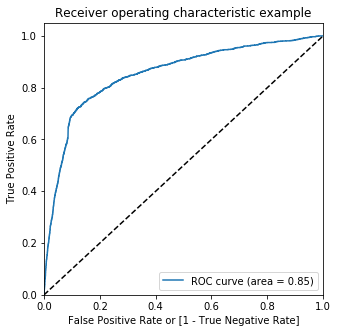

In [186]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [187]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.119804,11785,0,1,1,0,0,0,0,0,0,0,0
1,0,0.008105,11987,0,1,0,0,0,0,0,0,0,0,0
2,0,0.075688,11648,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000015,12890,0,1,0,0,0,0,0,0,0,0,0
4,0,0.005209,3762,0,1,0,0,0,0,0,0,0,0,0


In [188]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.814238  0.769959  0.818116
0.2   0.2  0.891238  0.650503  0.912321
0.3   0.3  0.912048  0.409817  0.956031
0.4   0.4  0.920857  0.211709  0.982961
0.5   0.5  0.921667  0.087522  0.994717
0.6   0.6  0.920333  0.033116  0.998032
0.7   0.7  0.920190  0.015967  0.999379
0.8   0.8  0.919667  0.004731  0.999793
0.9   0.9  0.919429  0.000591  0.999896


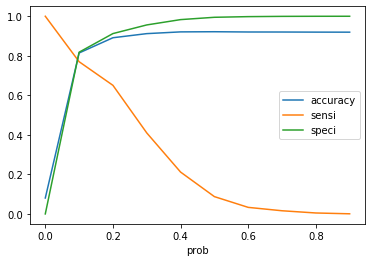

In [189]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [190]:
#thus we take optimal cut-off point as 0.34
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.07 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.119804,11785,0,1,1,0,0,0,0,0,0,0,0,1
1,0,0.008105,11987,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.075688,11648,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.000015,12890,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.005209,3762,0,1,0,0,0,0,0,0,0,0,0,0


In [191]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.753095238095238

In [192]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[14429,  4880],
       [  305,  1386]], dtype=int64)

In [193]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [194]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8196333530455352

In [195]:
# Let us calculate specificity
TN / float(TN+FP)

0.7472681133150344

In [196]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.25273188668496555


In [197]:
# Positive predictive value 
print (TP / float(TP+FP))

0.22119374401532077


In [198]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9792995792045609


In [199]:
from sklearn.metrics import precision_score, recall_score

In [200]:
#precision score
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.592

In [201]:
#Recall Score
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.08752217622708457

In [202]:
from sklearn.metrics import precision_recall_curve

In [203]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

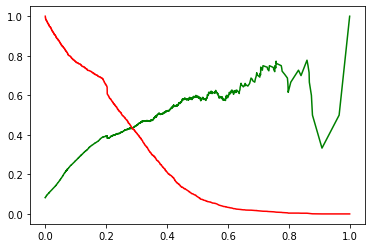

In [204]:
#plotting the Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [205]:
X_test_1 = X_test[col]
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,total_rech_6,total_rech_7,av_amt_6_7,Average_usage,Customer_Age,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
6102,-0.042018,-0.051478,-0.431655,-0.536874,-0.548881,-0.494992,-0.669763,-0.729433,-0.655378,-0.211944,-0.168046,-0.169673,-0.232413,-0.211540,-0.192132,-0.357017,-0.341987,-0.305308,-0.474079,-0.656913,-0.594471,-0.122882,-0.222788,-0.216853,-0.250072,-0.199179,-0.224949,-0.537796,-0.656793,-0.585189,-0.380142,-0.408487,-0.373254,-0.428534,-0.412334,-0.369150,-0.074142,-0.141659,-0.063738,-0.542048,-0.550370,-0.492240,-0.044048,-0.04386,-0.040774,-0.255155,-0.167790,-0.172815,-0.140957,-0.015160,-0.016828,-0.782179,-0.840911,-0.734983,-0.348665,-0.369500,-0.374652,-0.452269,-0.544663,-0.591123,-0.143525,-0.010025,0.197024,-0.519222,-0.578576,-0.583568,0.172048,-0.179917,-0.191835,-0.211444,-0.279837,-0.229817,0.130117,-0.136123,-0.124243,-0.035016,-0.316935,-0.287802,-0.487459,-0.645839,-0.630710,-0.308577,-0.13577,-0.234992,-0.138443,-0.150237,-0.159451,-0.074812,-0.086475,-0.088662,0.017540,-0.080537,-0.643976,0.083784,0.135773,-0.438870,-0.284615,-0.123992,-0.095029,-0.492729,0.336648,0.340926,-0.587543,-0.598072,-0.541753,-0.694135,-0.700252,-0.656217,-0.664112,-0.670667,-0.623153,-0.401189,-0.408175,-0.376513,-0.423358,-0.442850,-0.416085,-0.360796,-0.343960,-0.343262,-0.211037,-0.207517,-0.184095,-0.559188,-0.401980,-0.400504,-0.382233,-0.364843,-0.356511,-0.288380,-0.271193,-0.320980,0.960128,-0.668518,0,0,0,0,0,0,0,0,0,0,0,0
2539,-1.014833,-0.705605,-0.810840,-0.536940,-0.540905,-0.491794,-0.727364,-0.716555,-0.694340,-0.136770,-0.168046,-0.123846,-0.198134,-0.104919,-0.142312,-0.337901,-0.351215,-0.327239,-0.646673,-0.658352,-0.653949,-0.280118,-0.290731,-0.304296,2.773782,0.861096,0.140902,-0.650607,-0.667665,-0.641650,-0.400599,-0.395887,-0.367583,-0.440067,-0.432002,-0.383076,-0.156374,-0.141659,-0.143638,-0.565031,-0.555539,-0.499446,-0.044048,-0.04386,-0.040774,1.079826,0.01

In [206]:
#Adding constant
X_test_sm = sm.add_constant(X_test_1)

In [207]:
y_test_pred = res.predict(X_test_sm)

In [208]:
y_test_pred[:10]

6102     0.261205
2539     0.078341
21576    0.017214
19574    0.095619
12804    0.389843
24030    0.011924
20273    0.032420
7538     0.009432
3196     0.003315
12935    0.027107
dtype: float64

In [209]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [210]:
# Let's see the head
y_pred_1.head()

,0
6102,0.261205
2539,0.078341
21576,0.017214
19574,0.095619
12804,0.389843


In [211]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [212]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index

In [213]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [214]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['ID','churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,ID,churn,Churn_Prob
0,0,1,0.261205
1,1,1,0.078341
2,2,0,0.017214
3,3,0,0.095619
4,4,1,0.389843


In [215]:
#taking the Cut-off point as 0.07
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.07 else 0)
y_pred_final.head()

,ID,churn,Churn_Prob,final_predicted
0,0,1,0.261205,1
1,1,1,0.078341,1
2,2,0,0.017214,0
3,3,0,0.095619,1
4,4,1,0.389843,1


In [216]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.7476947005888235

In [217]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[6113, 2138],
       [ 133,  617]], dtype=int64)

In [218]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [219]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8226666666666667

In [220]:
# Let us calculate specificity
TN / float(TN+FP)

0.740879893346261

In [221]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2591201066537389


In [222]:
# Positive predictive value 
print (TP / float(TP+FP))

0.22395644283121596


In [223]:
# Negative predictive value
print (TN / float(TN+ FN))

0.97870637207813


In [224]:
#Displaying the 20 predicted IDs
y_pred_final.head(20)

,ID,churn,Churn_Prob,final_predicted
0,0,1,0.261205,1
1,1,1,0.078341,1
2,2,0,0.017214,0
3,3,0,0.095619,1
4,4,1,0.389843,1
5,5,0,0.011924,0
6,6,0,0.032420,0
7,7,0,0.009432,0
8,8,0,0.003315,0
9,9,0,0.027107,0


In [225]:
#precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.22395644283121596

In [226]:
#recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8226666666666667

In [227]:
p, r, thresholds = precision_recall_curve(y_pred_final.churn, y_pred_final.Churn_Prob)

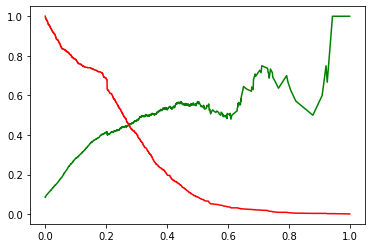

In [228]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

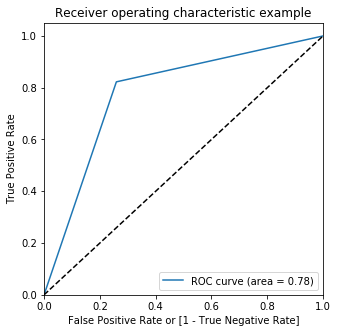

In [229]:
#ROC on test set
draw_roc(y_pred_final.churn, y_pred_final.final_predicted)

In [230]:
#lead score for customer in the range 0-100
y_train_pred_final['Churn_Score'] = y_train_pred_final.Churn_Prob.map(lambda x: x*100)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Churn_Score
0,0,0.119804,11785,0,1,1,0,0,0,0,0,0,0,0,1,11.980369
1,0,0.008105,11987,0,1,0,0,0,0,0,0,0,0,0,0,0.810463
2,0,0.075688,11648,0,1,0,0,0,0,0,0,0,0,0,1,7.568832
3,0,0.000015,12890,0,1,0,0,0,0,0,0,0,0,0,0,0.001533
4,0,0.005209,3762,0,1,0,0,0,0,0,0,0,0,0,0,0.520901


In [231]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

arpu_7              0.63
std_og_mou_8       -0.41
loc_ic_mou_7        0.30
loc_ic_mou_8       -1.98
std_ic_mou_8       -0.33
total_rech_amt_8   -1.33
fb_user_8_1.0      -1.69
dtype: float64

In [232]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

arpu_7              100.00
std_og_mou_8        -65.39
loc_ic_mou_7         46.92
loc_ic_mou_8       -313.81
std_ic_mou_8        -52.43
total_rech_amt_8   -210.98
fb_user_8_1.0      -267.49
dtype: float64

In [233]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

arpu_7              3
std_og_mou_8        6
loc_ic_mou_7        5
loc_ic_mou_8        1
std_ic_mou_8        4
total_rech_amt_8    2
fb_user_8_1.0       0
dtype: int64

<Figure size 864x576 with 0 Axes>

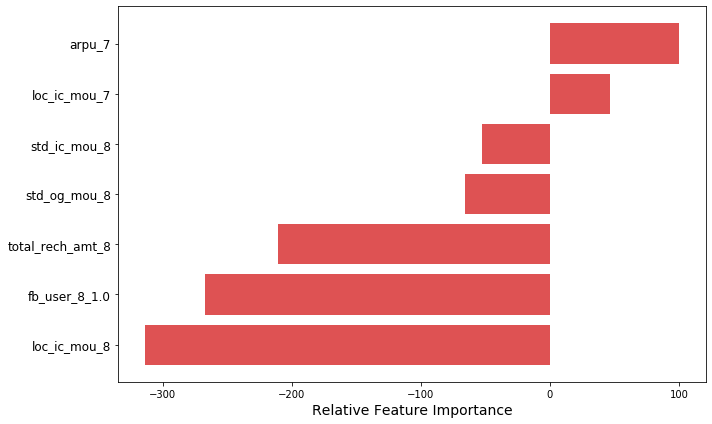

In [234]:
#Plot showing the feature variables based on their relative coefficient values
#Plotting the scree plot
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

## Logistic Regression with Hypertunning

In [235]:
from sklearn import metrics
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy 0.8416842573047439
Sensitivity 0.8226666666666667


## Lasso

In [236]:
logreg = LogisticRegression(penalty = 'l1', solver = 'saga',class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy 0.8182424175091656
Sensitivity 0.836


## Ridge

In [237]:
logreg = LogisticRegression(penalty = 'l2', solver = 'saga',class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy 0.8185757138095767
Sensitivity 0.836


In [238]:
100*m_df.churn.value_counts(normalize=True)

0   91.86
1    8.14
Name: churn, dtype: float64

## GridSearch

In [239]:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.0001, 0.001, 0.005, 0.1,0.2 ,0.3 ,0.4, 0.5, 1, 2], 'penalty' :['l1', 'l2'] , 'class_weight'  : [{0:0.08, 1: 0.92}, 'balanced']}
algo = LogisticRegression()

model = GridSearchCV(estimator = algo, param_grid = params, scoring = 'recall')
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 1,
                               2],
                         'class_weight': [{0: 0.08, 1: 0.92}, 'balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', 

In [240]:
model.best_score_

0.833219877467665

In [241]:
model.best_params_

{'C': 0.5, 'class_weight': {0: 0.08, 1: 0.92}, 'penalty': 'l2'}

In [242]:
logreg = LogisticRegression(penalty = 'l2', solver = 'saga', class_weight = {0:0.08, 1: 0.92}, C = 0.5)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy 0.799911120986557
Sensitivity 0.832


In [243]:
#Making prediction on the test data
pred_test = logreg.predict_proba(X_test)
y_pred_default = logreg.predict(X_test)

In [244]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8251
           1       0.27      0.83      0.41       750

    accuracy                           0.80      9001
   macro avg       0.63      0.81      0.64      9001
weighted avg       0.92      0.80      0.84      9001

[[6576 1675]
 [ 126  624]]
accuracy_score :  0.799911120986557


In [245]:
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [246]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8877705328647033


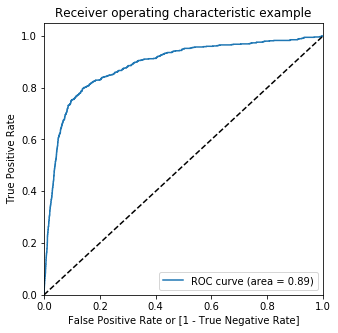

In [247]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [248]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.71,1,1,1,1,1,1,1,1,0,0
1,1,0.40,1,1,1,1,1,0,0,0,0,0
2,0,0.20,1,1,0,0,0,0,0,0,0,0
3,0,0.42,1,1,1,1,1,0,0,0,0,0
4,1,0.81,1,1,1,1,1,1,1,1,1,0


In [249]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.08   0.00   1.00
0.10  0.10      0.30   0.24   0.97
0.20  0.20      0.47   0.43   0.96
0.30  0.30      0.61   0.58   0.92
0.40  0.40      0.72   0.70   0.88
0.50  0.50      0.80   0.80   0.83
0.60  0.60      0.86   0.87   0.79
0.70  0.70      0.90   0.92   0.71
0.80  0.80      0.92   0.96   0.54
0.90  0.90      0.92   0.99   0.21


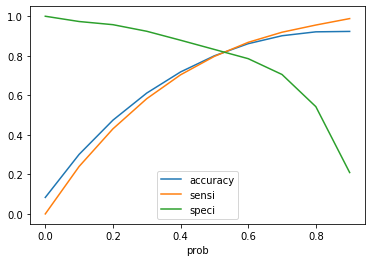

In [250]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [251]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5354849268286337]


In [252]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.54 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.54 else 0)

y_pred_final.churn.value_counts()

0    8251
1     750
Name: churn, dtype: int64

In [253]:
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6830, 1421],
       [ 134,  616]], dtype=int64)

In [254]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.799911120986557
Sensitivity:  0.8213333333333334
Specificity:  0.8277784510968368
false postive rate:  0.17222154890316324
positive predictive value:  0.3024054982817869
Negative predictive value:  0.9807581849511775


## Random Forest

In [256]:
from sklearn.ensemble import RandomForestClassifier
rf_model  =  RandomForestClassifier(class_weight = 'balanced')
rf_model.fit(X_train_copy, y_train)

y_pred = rf_model.predict(X_test_copy)
print("Accuracy {}".format(metrics.accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(metrics.recall_score(y_test,y_pred)))

Accuracy 0.9424508387956894
Sensitivity 0.42933333333333334


In [257]:
param_grid = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100, 400, 200),
    'class_weight': [{0:0.08, 1: 0.92}, 'balanced'],
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [12, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1)

In [258]:
grid_search.fit(X_train_copy, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 12.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 29.1min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed: 41.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [259]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.896952380952381 using {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [261]:
rf = RandomForestClassifier(max_depth=12,
                            max_features=12,
                            class_weight='balanced',
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=10)

In [262]:
rf.fit(X_train_copy, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [263]:
m_feature = pd.concat((pd.DataFrame(X.columns, columns = ['Varibale']), 
pd.DataFrame(rf.feature_importances_, columns = ['importance'])), axis = 1).sort_values(by = 'importance', ascending = False)
m_feature = m_feature.reset_index()
m_feature = m_feature.drop('index',axis = 1)
m_feature.head(10)

,Varibale,importance
0,total_ic_mou_8,0.09
1,total_og_mou_8,0.08
2,last_day_rch_amt_8,0.06
3,loc_ic_mou_8,0.05
4,total_rech_amt_8,0.05
5,loc_ic_t2m_mou_8,0.04
6,av_rech_amt_data_8,0.04
7,arpu_8,0.04
8,max_rech_amt_8,0.04
9,roam_ic_mou_8,0.03


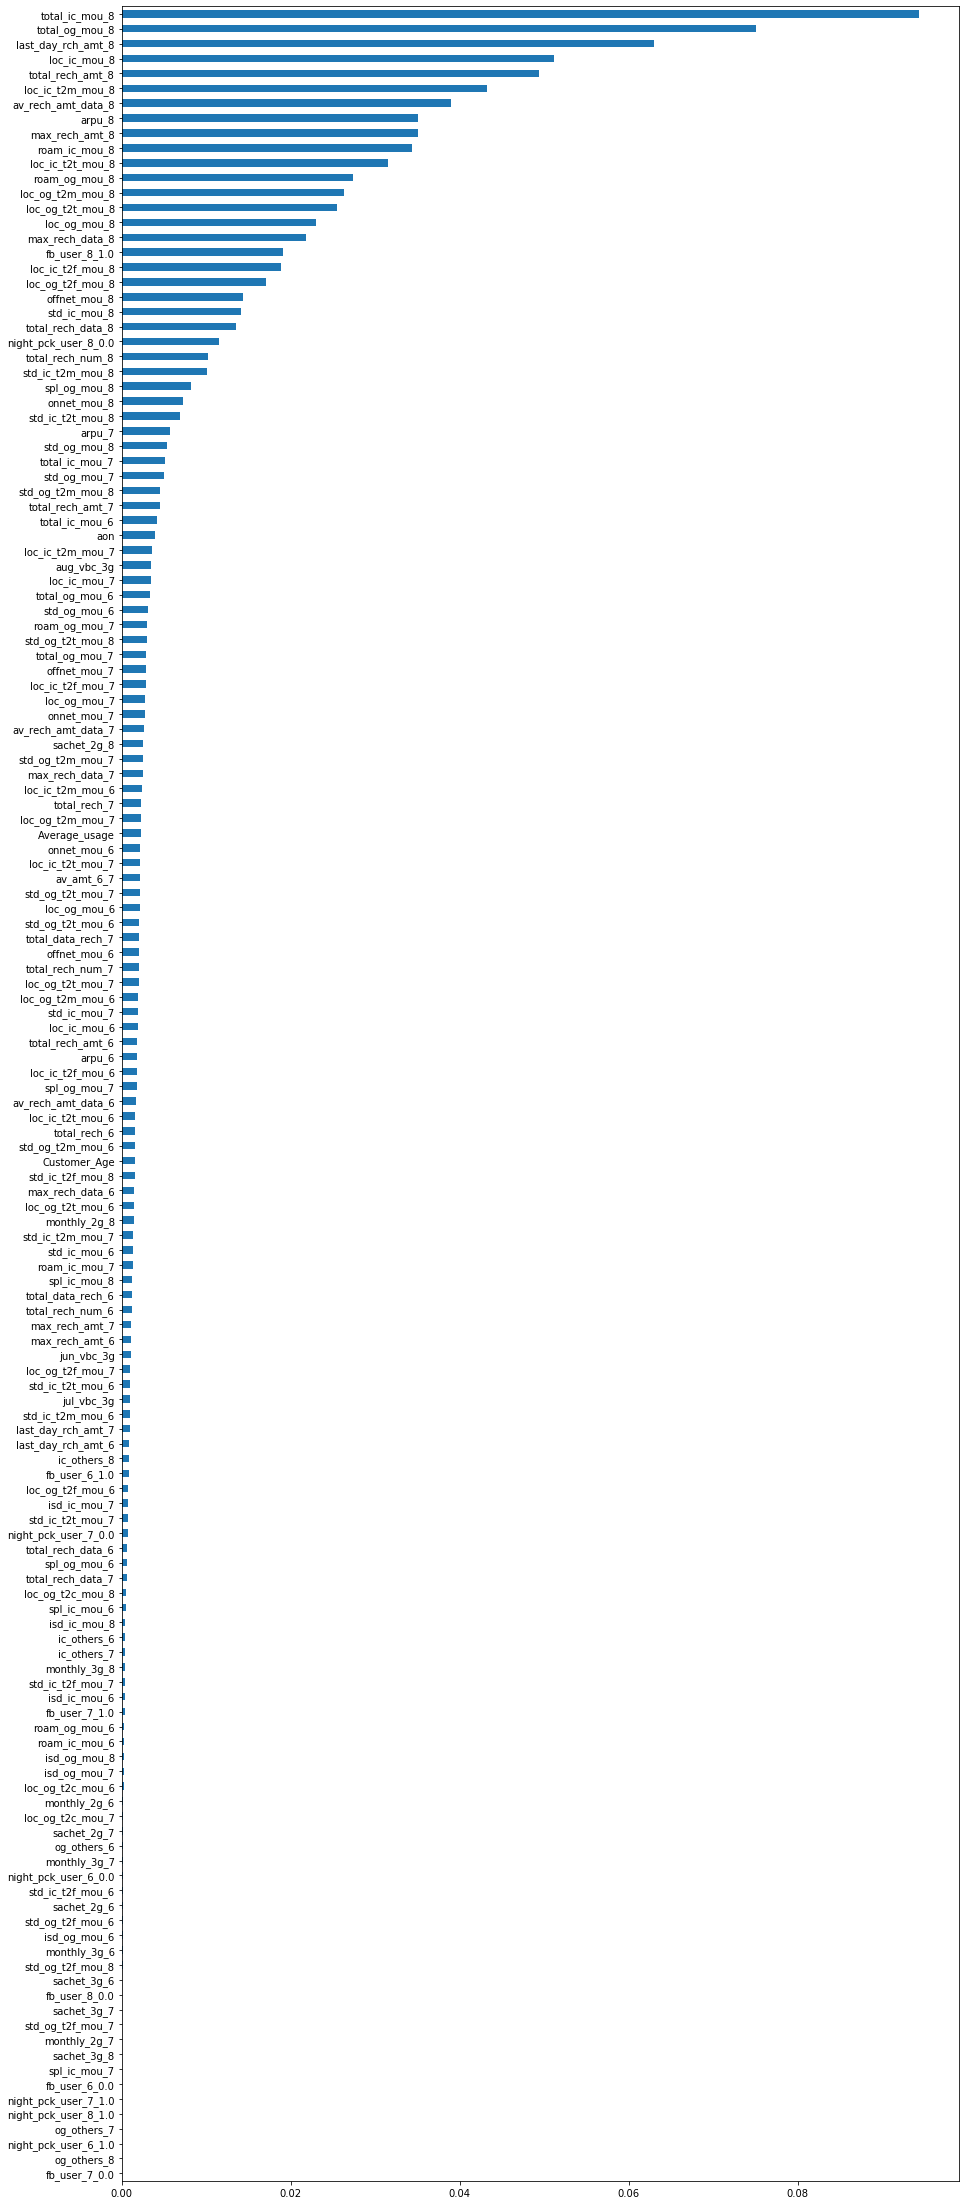

In [264]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')
plt.show()

Inferences:

1. Logistic Regression and Random Forest performed better than Decision Tree for customer churn analysis for this particular dataset, using PCA.

2. Using RFE model
   1. The Top features tends to be show postive tend on : arpu_7 and loc_ic_mou_7        
   2. And the features which tends to show negative impact are : std_og_mou_8, loc_ic_mou_8, std_ic_mou_8, total_rech_amt_8
3. Using Random Forest, the top 10 features are as follows:
   1.    total_ic_mou_8
   2.        total_og_mou_8
   3.    last_day_rch_amt_8
   4.          loc_ic_mou_8
   5.      total_rech_amt_8
   6.      loc_ic_t2m_mou_8
   7.    av_rech_amt_data_8
   8.                arpu_8
   9.        max_rech_amt_8
   10.         roam_ic_mou_8
 
4. Without using PCA, logistic regression with GridsearchCV tend to show better result than other models.
Lets see the evalution of model parameters on different models

For Model bulding we have used the below techniues using PCA

1. Decision Tree
   1. Accuracy Score :  0.777469170092212
   2. Sensitivity:  0.7546666666666667
   3. Specificity:  0.7795418737122773
   4. false postive rate:  0.2204581262877227
   5. positive predictive value:  0.23731656184486374
   6. Negative predictive value:  0.9721886336154776

2. Random Forest
   1. Accuracy Score :  0.8271303188534608
   2. Sensitivity:  0.7786666666666666
   3. Specificity:  0.8315355714458853
   4. false postive rate:  0.16846442855411464
   5. positive predictive value:  0.29584599797365757
   6. Negative predictive value:  0.9763768322185855

3. Logistic Regression using PCA
   1. Accuracy Score :  0.7740251083212977
   2. Sensitivity:  0.828
   3. Specificity:  0.8242637256090171
   4. false postive rate:  0.1757362743909829
   5. positive predictive value:  0.2998551424432641
   6. Negative predictive value:  0.9813852813852814

For Feature estimation we have used the following model

1. Logistic regression using RFE
   1. Accuracy Score : 0.7476947005888235
   2. Sensitivity : 0.8226666666666667
   3. specificity : 0.740879893346261
   4. false postive rate : 0.2591201066537389
   5. Positive predictive value : 0.22395644283121596


# ThankYou